# Week n°1 : Setting up the Environment GCP (Cloud VM + SSH access)

## Steps for Creating a New Project in GCP
 - Go to the [Google Cloud Console](https://console.cloud.google.com/) and sign in to your Google account.

 - Click on the project drop-down and select or create the project that you want to use for the new project.

 - In the Navigation menu, click on the "IAM & admin" button, then select "Settings."

 - Under the "Project settings" tab, click on the "New Project" button.

 - Enter a name for your new project and select a billing account (if you haven't created one yet, you can do so now by clicking on the "Create billing account" button).

 - Choose a location for your project's resources and click "Create."

 - Once the project is created, you will be redirected to the project's dashboard. From here, you can access all of the services and resources associated with your project.

 - To enable the Google Cloud services that you need for your project, click on the "Enable API's and Services" button on the dashboard and select the services you need.

 - In order to access the resources of your project, you need to create credentials. Go to the navigation menu and click on the "IAM & admin" button, then select "Credentials."

 - Click on "Create credentials" and select the type of credentials you need.

# Create the VM Instance

 - In the menu select Compute Engine and then VM Instances

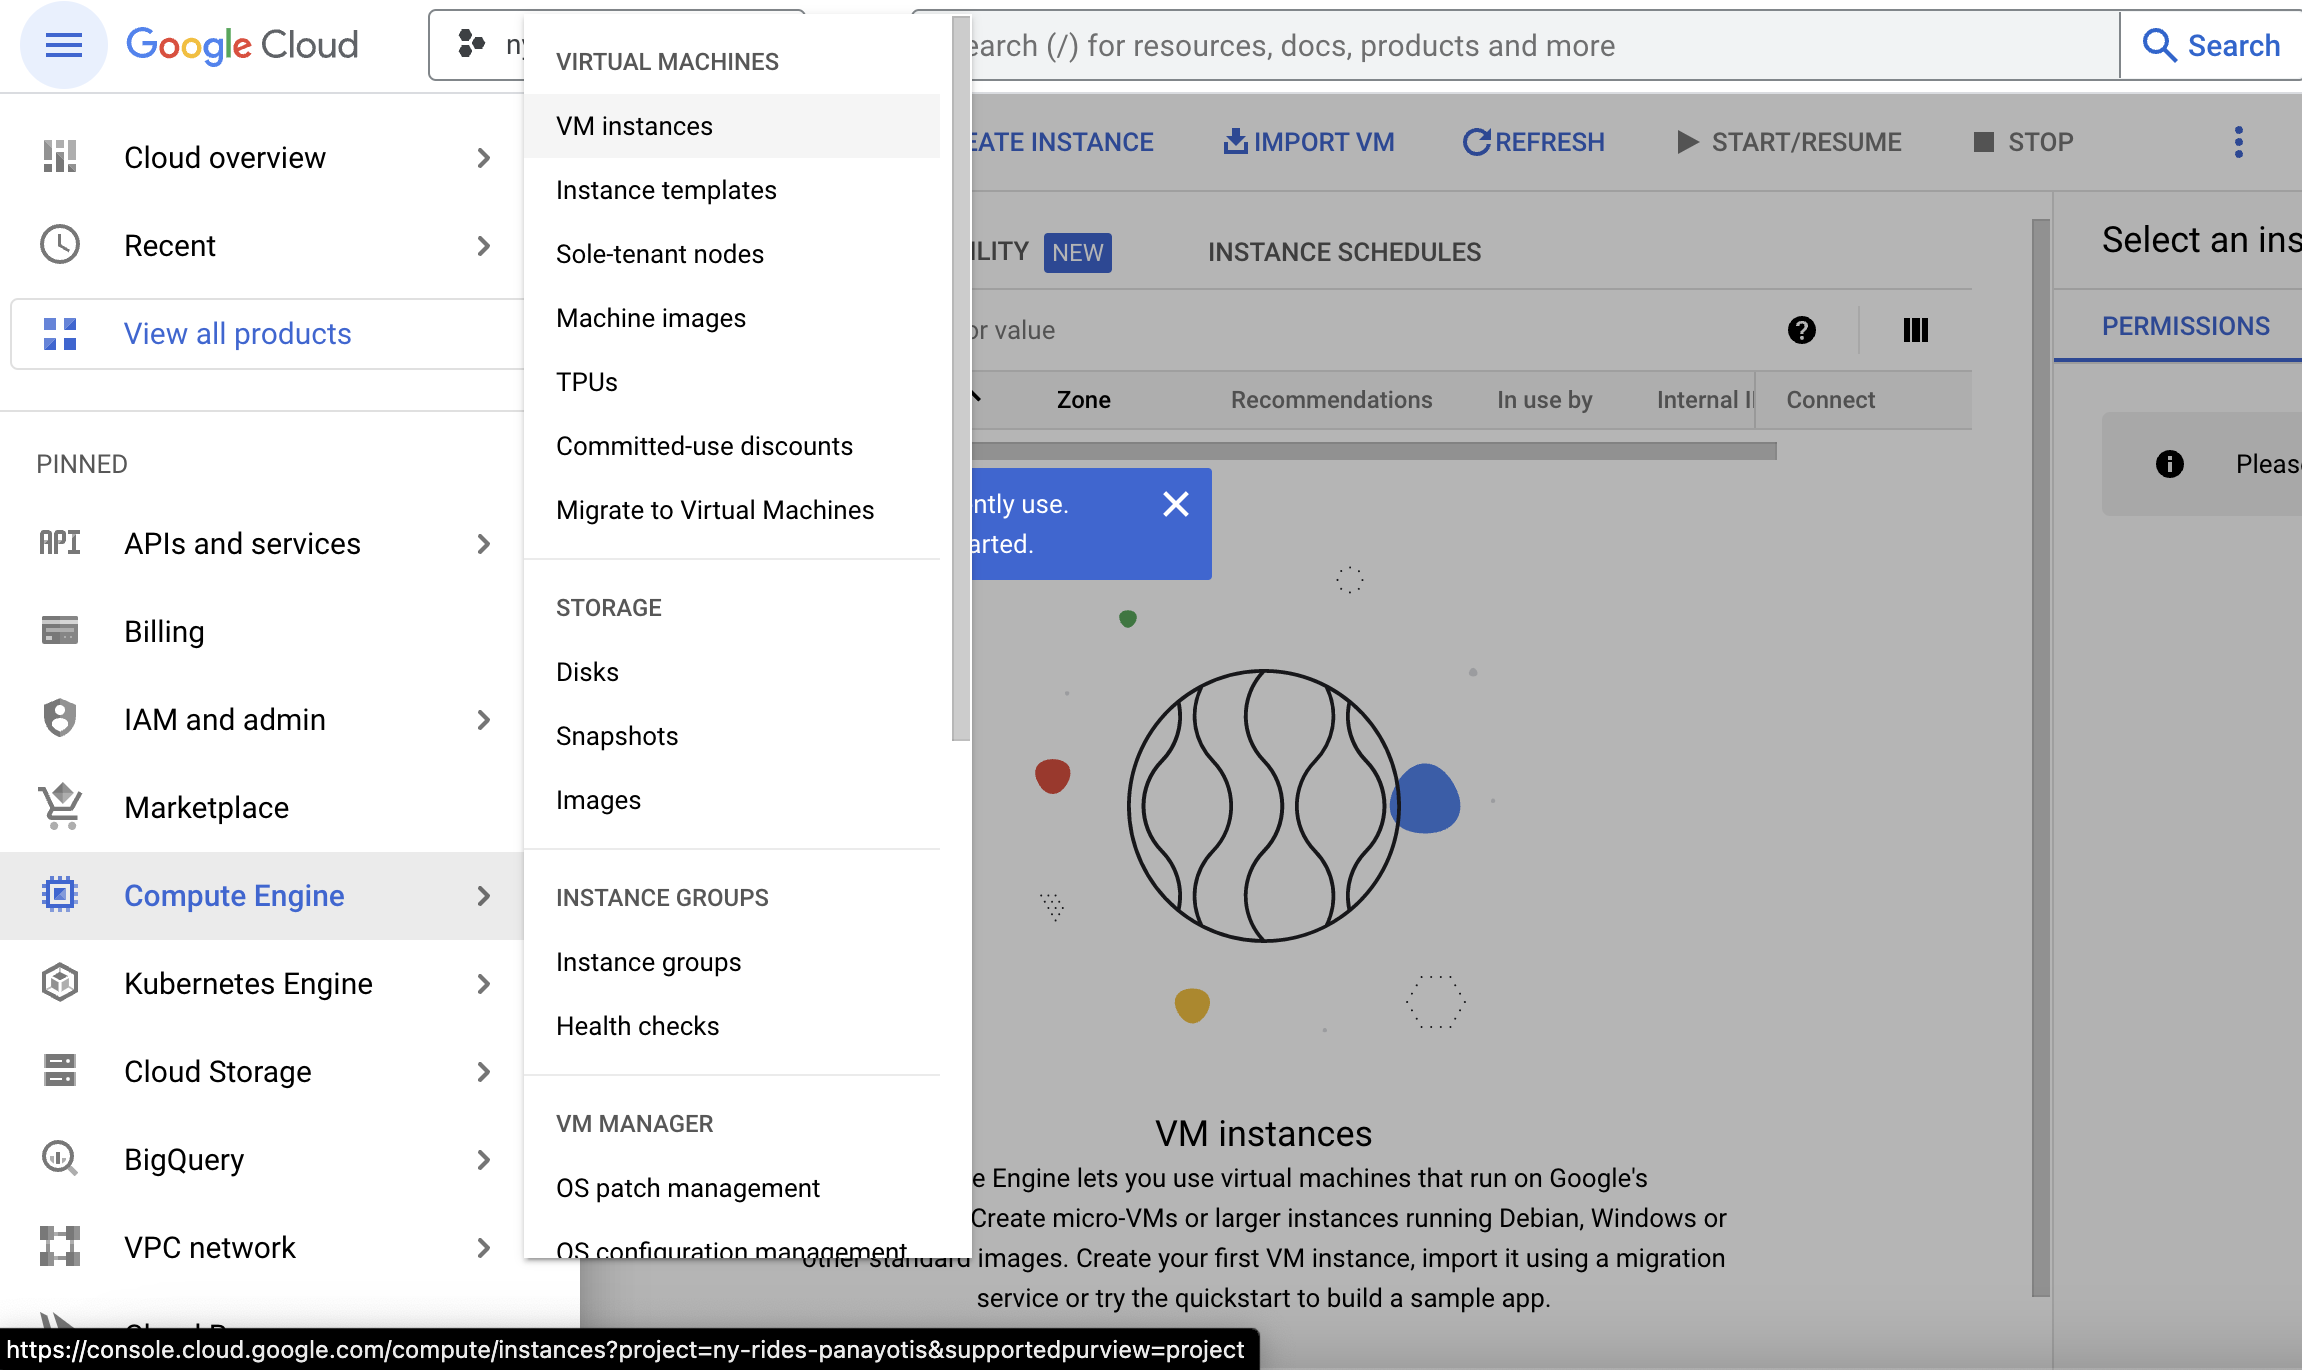

In [2]:

from IPython.display import Image
Image(filename='../images/vm_instances.png')

## Generate SSH keys

In the terminal :

 - Go to the ssh folder : ``` cd ~/.ssh```
 - Generate the ssh key (following gcp documentation) : ```ssh-keygen -t rsa -f gcp -C panayotis -b 2048``` (leave empty the passphrase)

Now the two keys are ready gcp and gcp.pub (public).

 - Go now to **Metadata** in the GCP platform to pair the public key.
 - Print the public key ```cat gcp.pub``` and copy peaste it to the ssh keys tab.


## Create the VM Instance

 - Go back to VM Instances and make sure you are in the correct project (upper left).
 - Click to create new instance.
 - Set the following setup and click create.

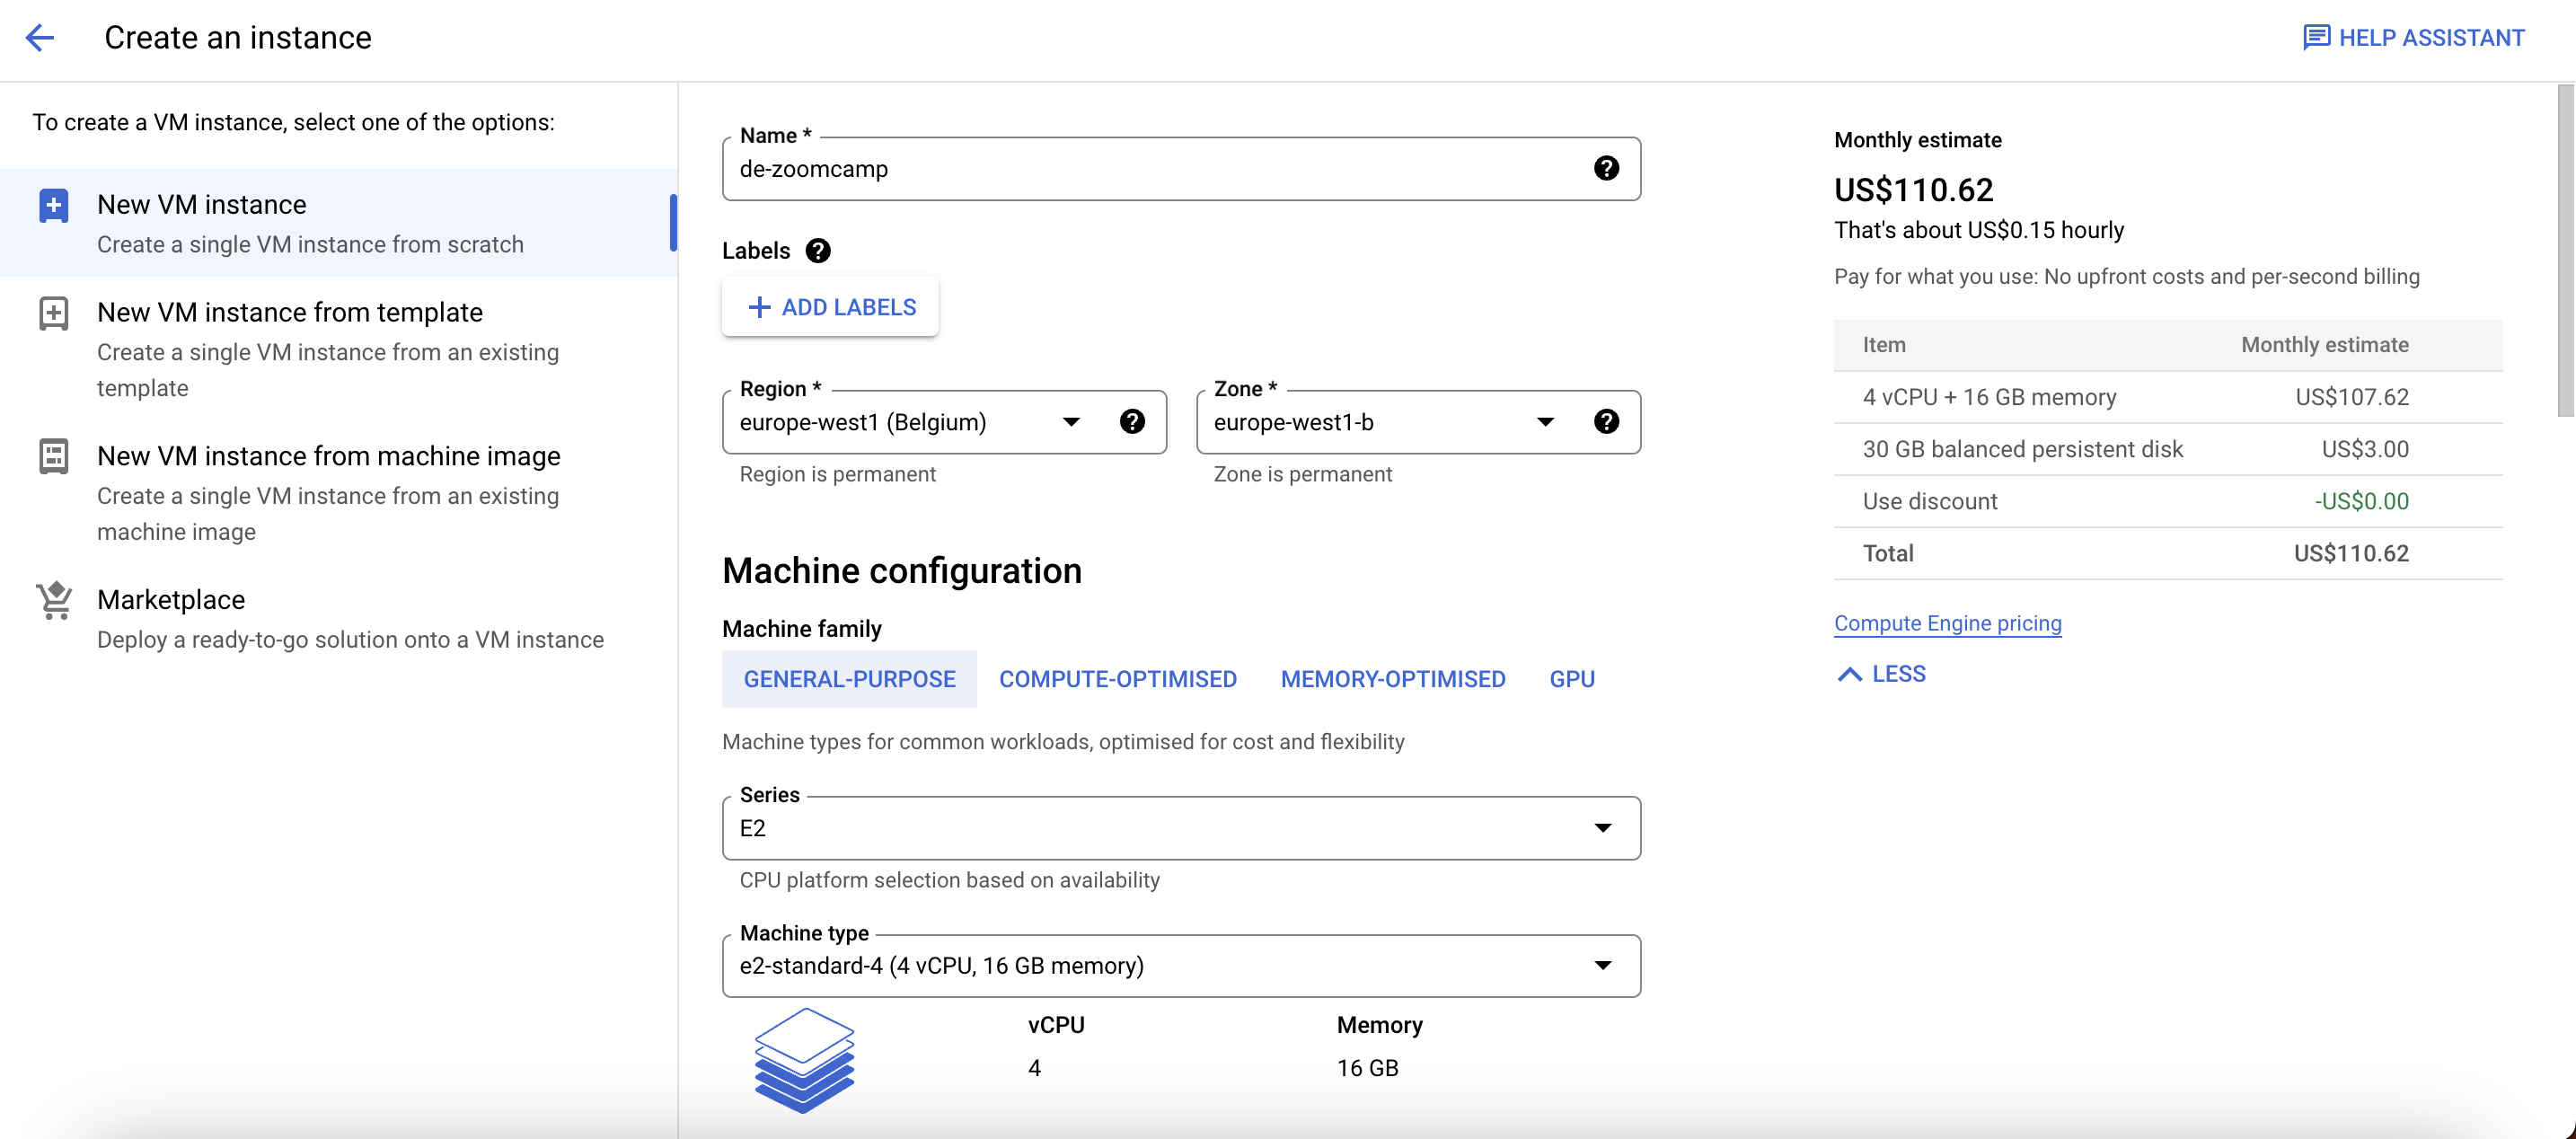

In [5]:
Image(filename='../images/vm_setup.png')

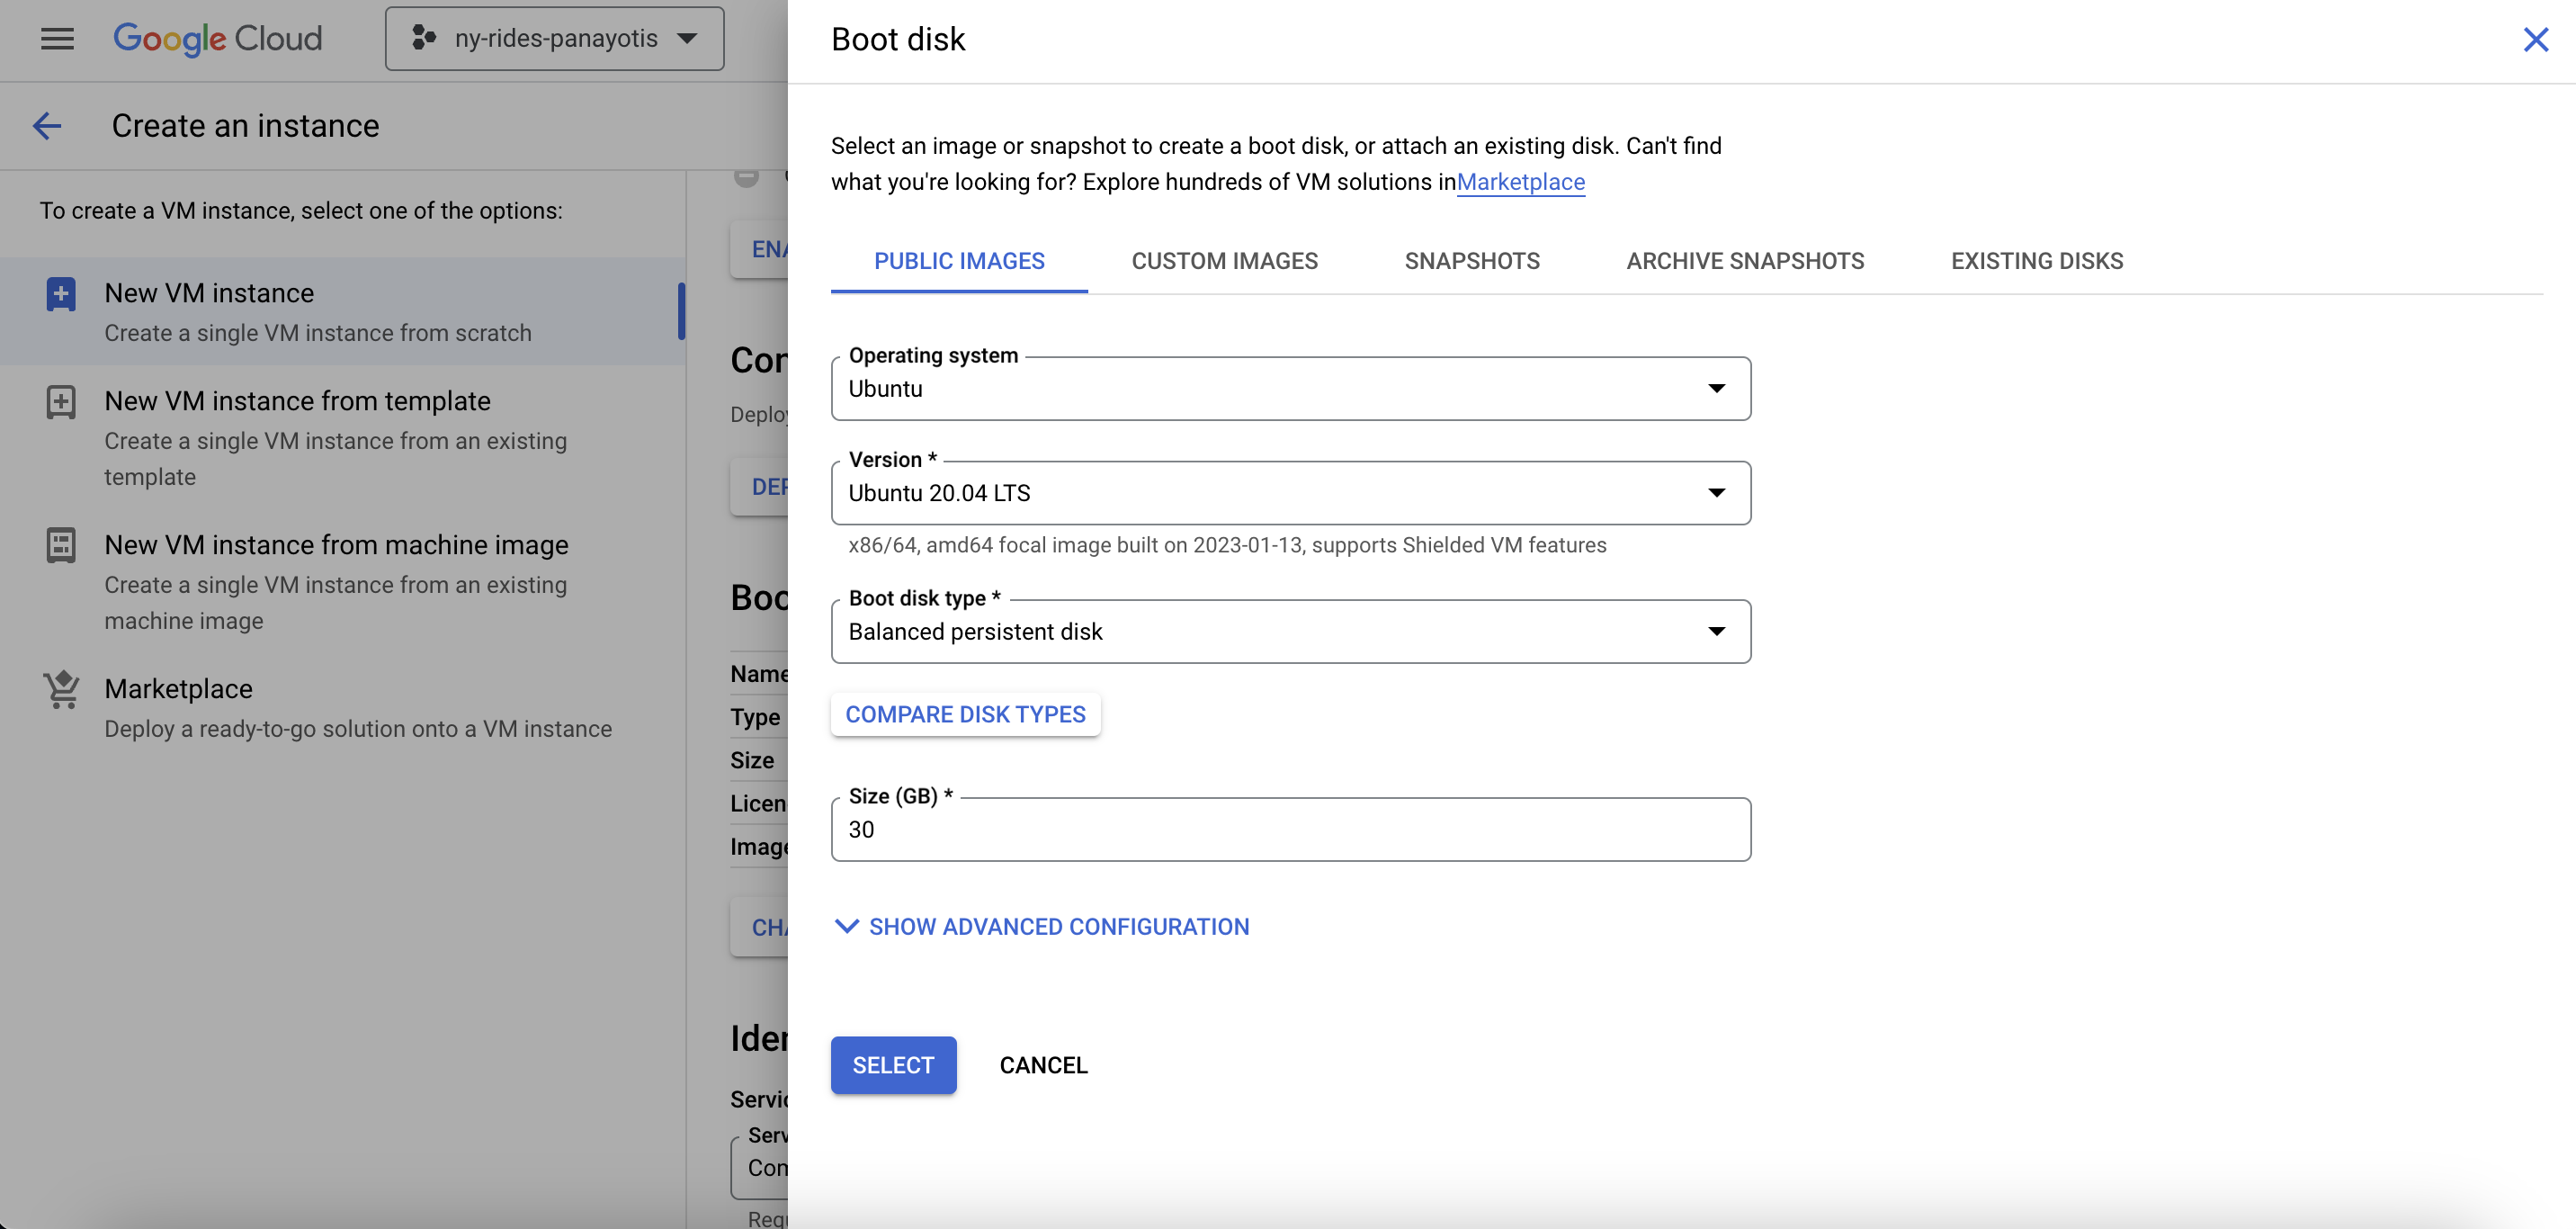

In [6]:
Image(filename='../images/boot_disk_setup.png')

## SSH into the VM

- Copy the External IP from the created instance.
- In the terminal : ```ssh -i ~/.ssh/gcp panayotis@34.78.171.148``` with ~/.ssh/gcp the **private key** and **panayotis** the name used for generating the key and **34.78.171.148** the copied External IP.

## Download and install Anaconda

 - In the terminal : ```wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh```the Linux version of Anaconda (from official website anaconda.com)
 - Run : ```bash Anaconda3-2022.10-Linux-x86_64.sh```
 - Answer yes to the two questions during the installation (licenseagreement & conda init).
 - Now every time we login the (base) environment is directly launched.
 - Don't forget to lougout and login to activate the first time (or ```source .bashrc```).

## Configure VM and setup local ~/.ssh/config

Configure the **config** for a easier connection with ssh.
 - Go to the ssh folder : ```cd ~/.ssh```
 - Create a file called config : ```touch config```
 - Open in Vscode with the following command : ```code config```
 - Add the following infos :
      ```python
      Host de-zoomcamp
         HostName XX.XX.XXX.XXX (the external ID)
         User panayotis
         IdentityFile ~/.ssh/gcp
      ```



# Install docker &
- Run in the terminal : ```sudo apt-get update``` and ```sudo apt-get install docker.io``` (in the VM)

# Setup the VScode to SSH directly

 - In VScode go to the extensions and search Remote ssh.
 - Install the extension.
 - Click on the remote window (as shown in the second image below).
 - Select in the upper selection tab : Connect to Host
 - It will detect automatically the de-zoomcamp connection (thanks to the config file).
 - The VSCode will relaunch directly on the VM.

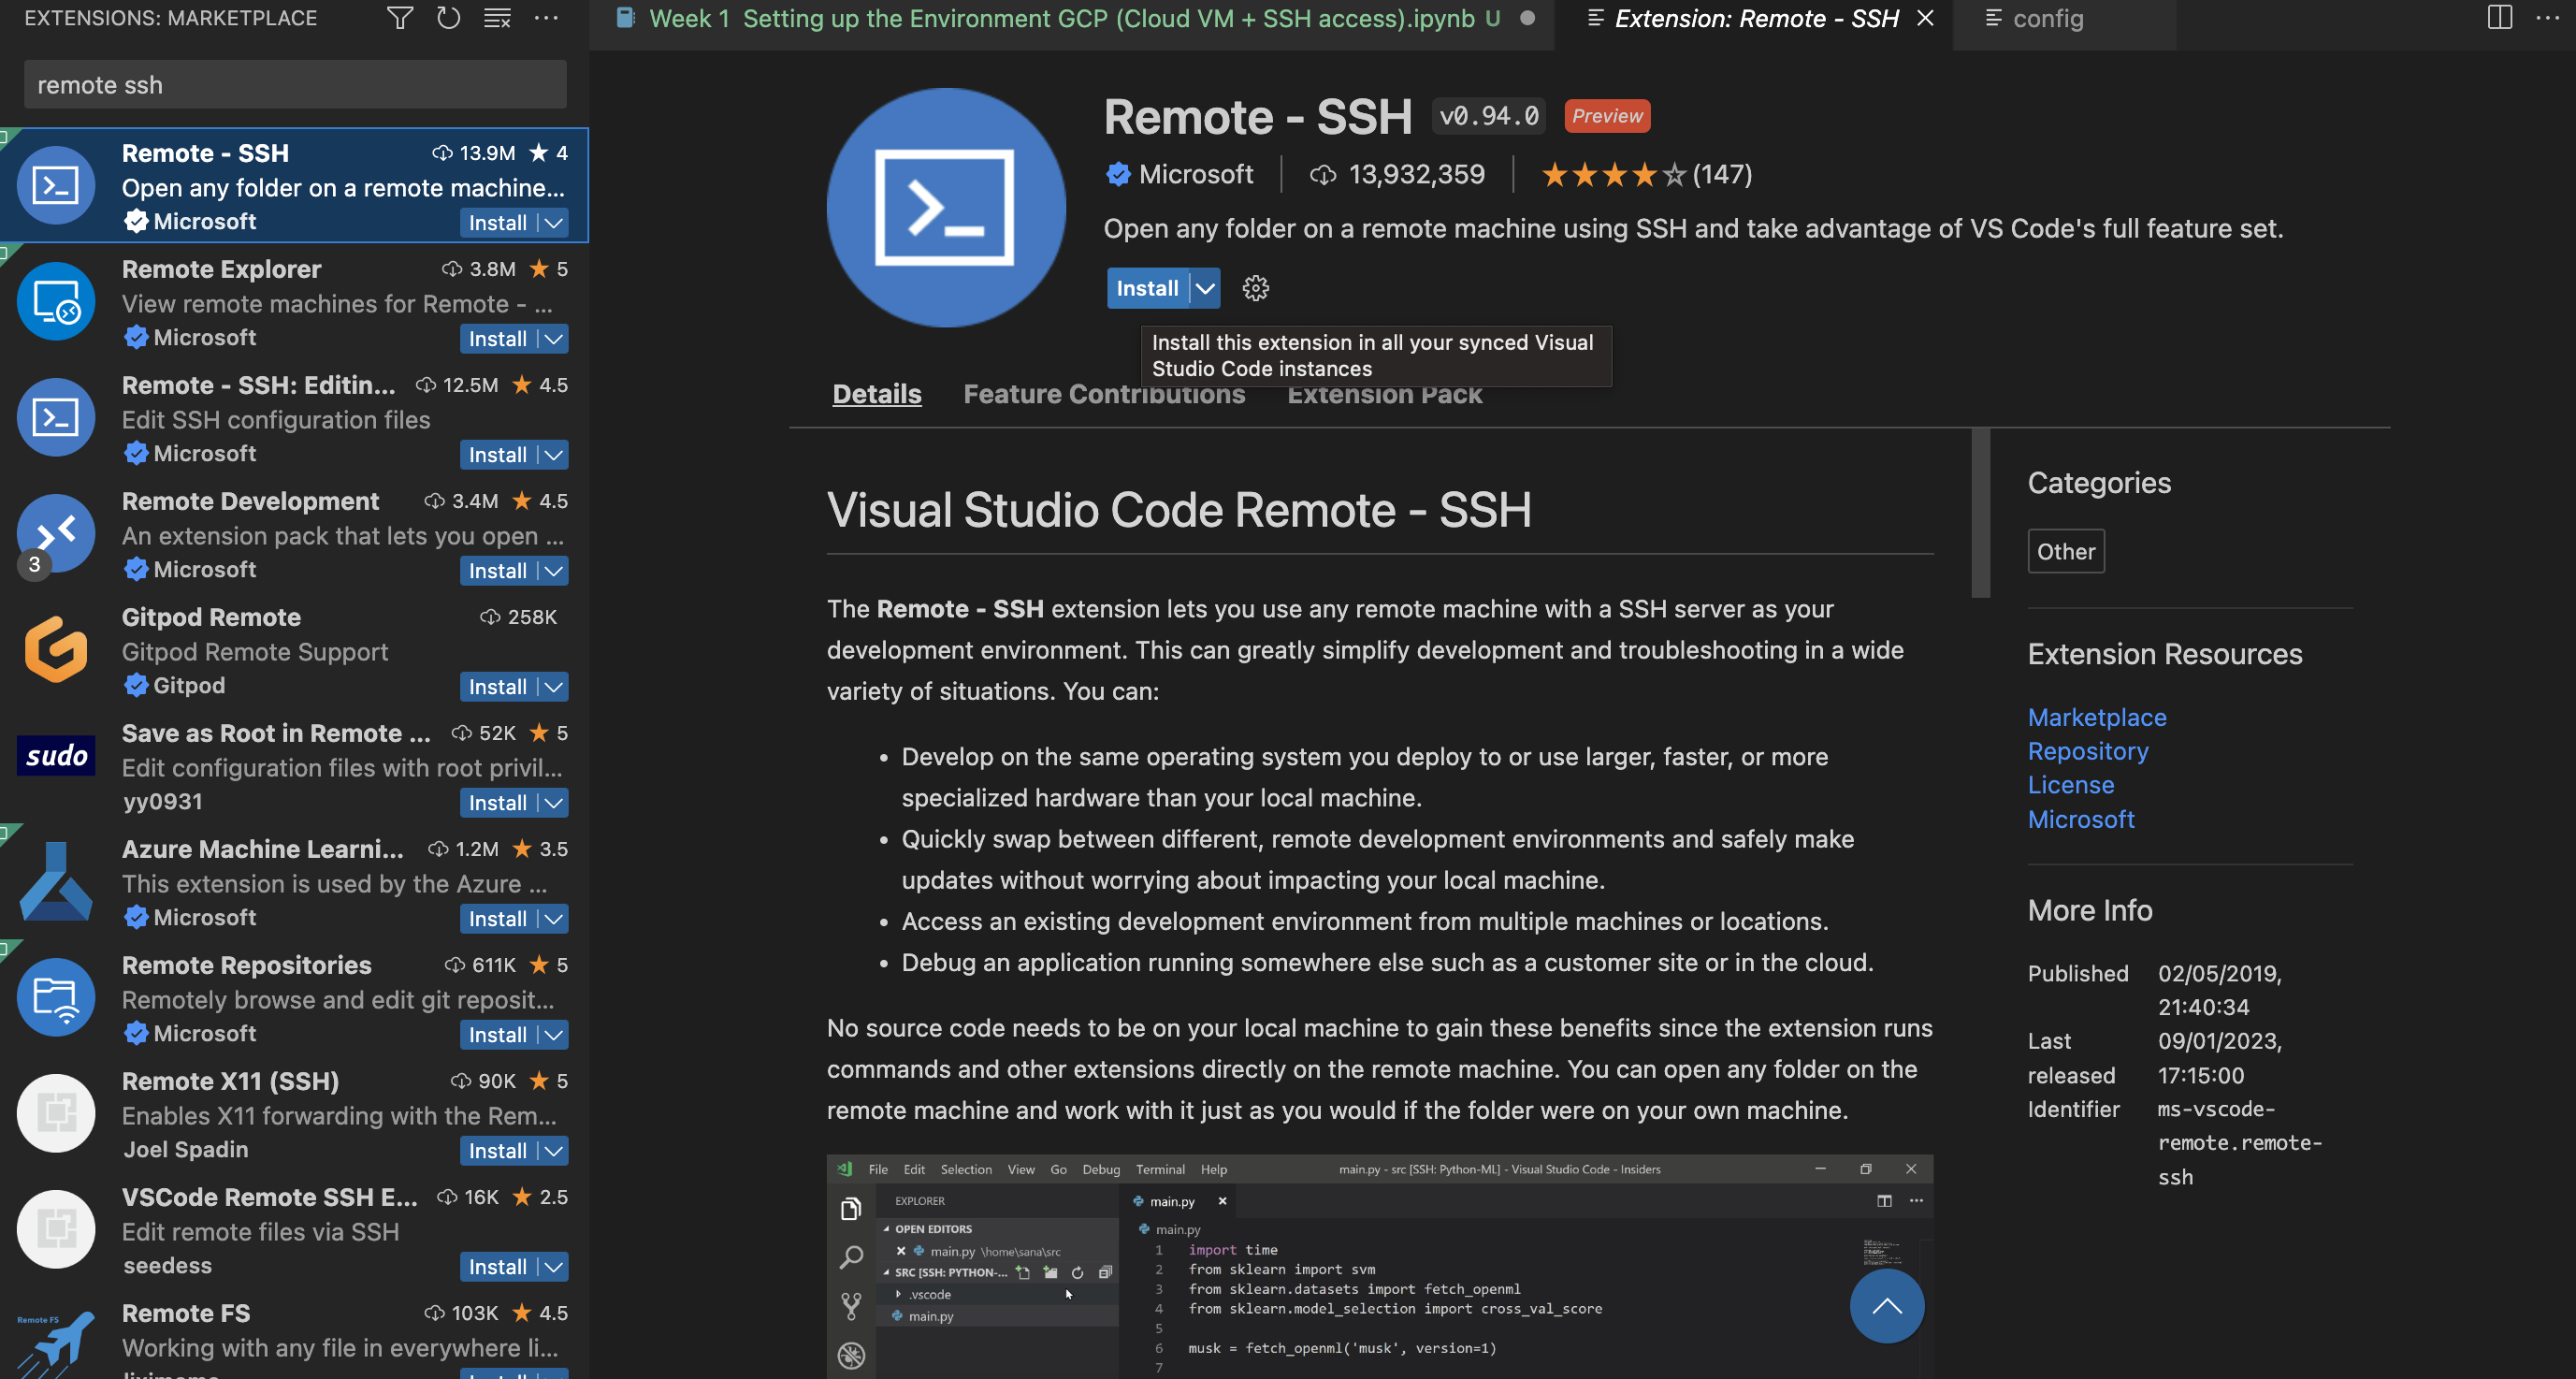

In [9]:
Image(filename='../images/vscode_rm_ssh_1.png')

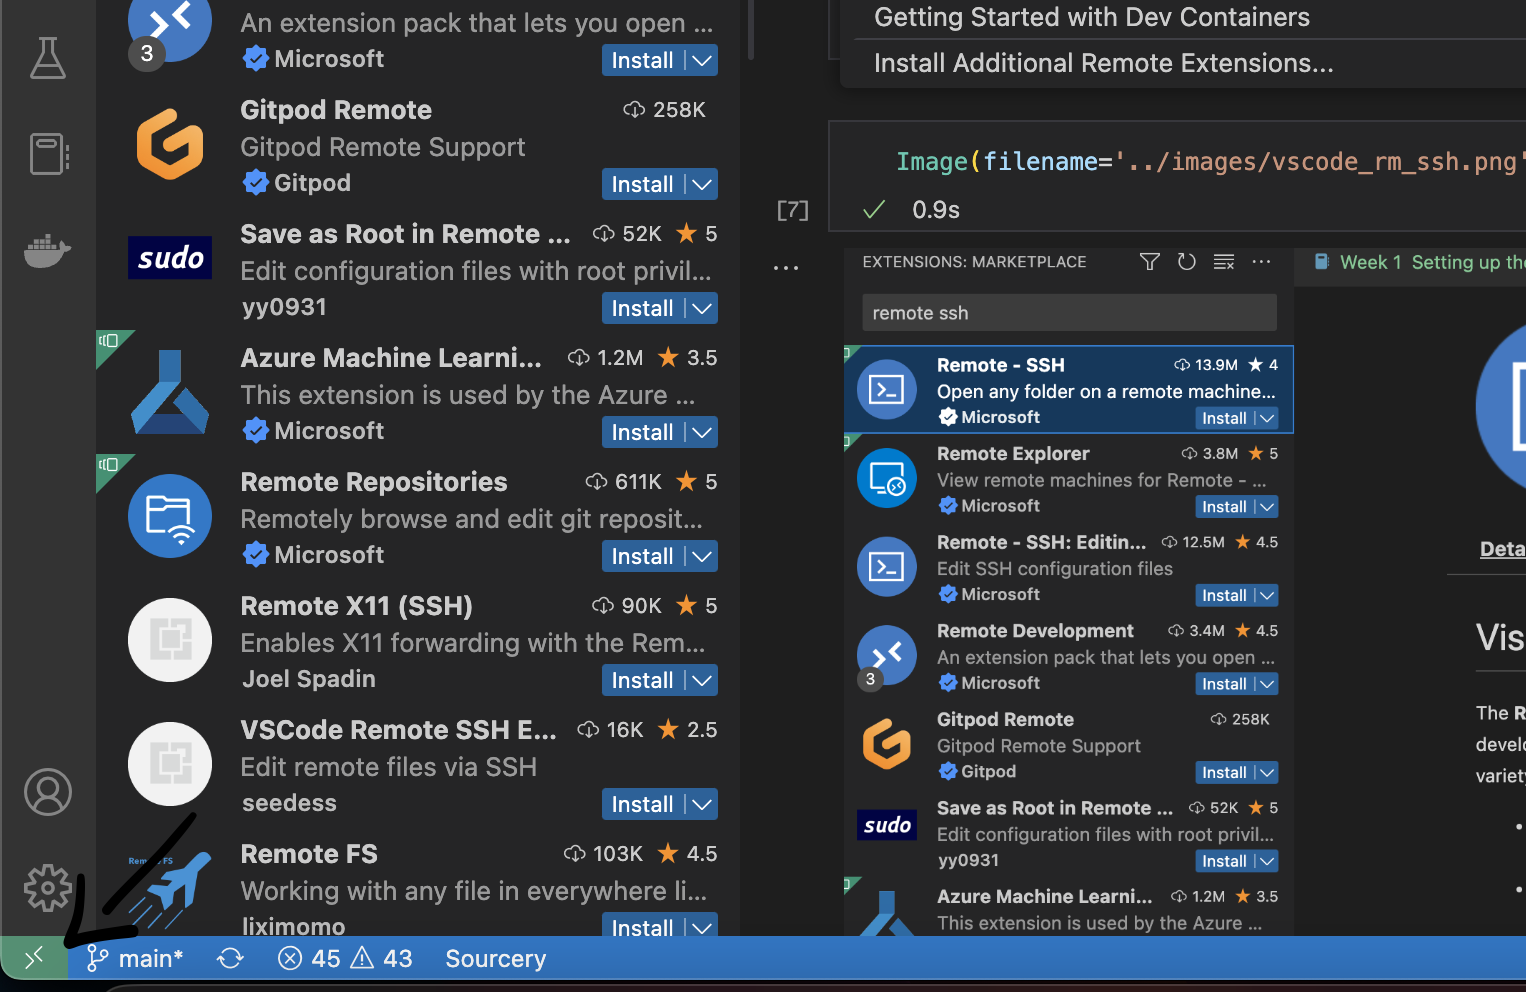

In [11]:
Image(filename='../images/vscode_rm_ssh_2.png')

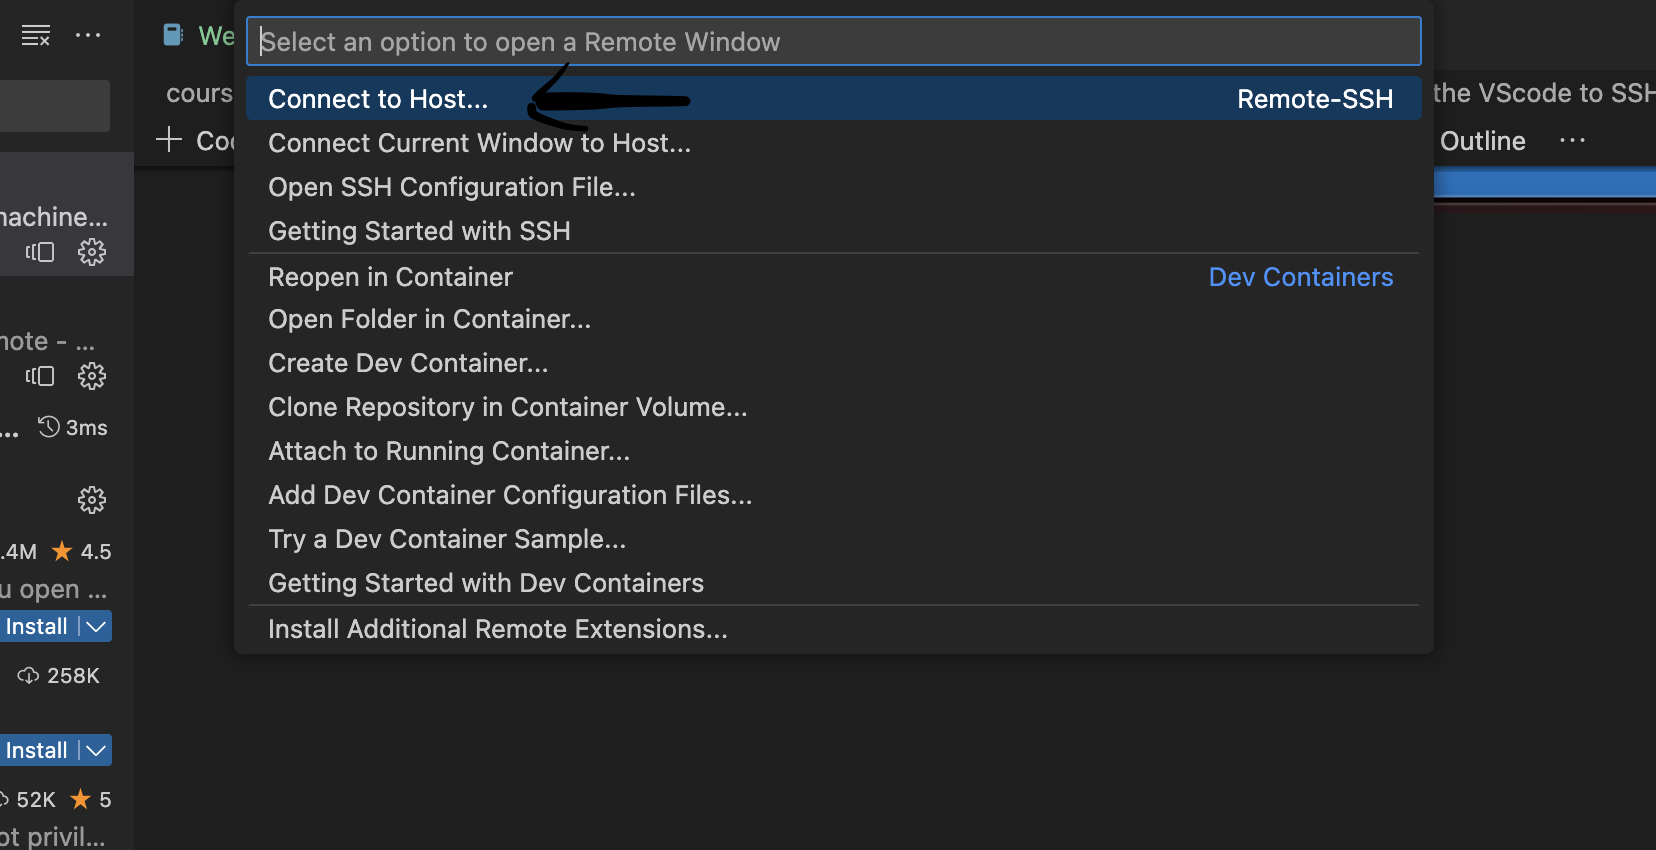

In [12]:
Image(filename='../images/vscode_rm_ssh_3.png')

## Configure the VM

### Pull the git repo of the course

 - Inside the terminal of the VM : ```git clone https://github.com/DataTalksClub/data-engineering-zoomcamp.git```

### Docker Configuration :
 - Run in the terminal : ```docker run hello-world````
 - An error occured : 
 ```
 docker: Got permission denied while trying to connect to the Docker daemon socket at unix:///var/run/docker.sock: Post "http://%2Fvar%2Frun%2Fdocker.sock/v1.24/containers/create": dial unix /var/run/docker.sock: connect: permission denied. See 'docker run --help'.
 ```
 - We need to give permissions (detailed instructions in this link https://github.com/sindresorhus/guides/blob/main/docker-without-sudo.md):
    - ```sudo groupadd docker``` (says that the group already exists)
    - ```sudo gpasswd -a $USER docker``` (Adding user panayotis to group docker)
    - ```sudo service docker restart``` (restart docker deamon)
    - Logout and login !
    - Hit ````docker run hello-world``` to see that it works!

### Install docker-compose
 - Go to docker compose repo (https://github.com/docker/compose), go to the lastest release.
 - Find the linux version (docker-compose-linux-x86_64) and copy the link address.
 - Make a dir bin and download the docker compose inside and make it executable : 
    - ```mkdir bin```
    - ```cd bin``` (to store all the executables)
    - ```wget https://github.com/docker/compose/releases/download/v2.15.1/docker-compose-linux-x86_64 -O docker-compose``` (specify that the output is called docker-compose)
    - ```chmod +x docker-compose``` (make docker-compose executable, after this the name of docker-compose is colored in green)
    - ```./docker-compose version``` (check the version)
 - Add to the path directory in order to call it from anywhere.
   - ```cd ..``` (exit from the bin directory) 
   - ```nano .bashrc``` (edit the bashrc file)
   - Add at the end`of the file the following command : ```export PATH="${HOME}/bin:${PATH}"```
   - ```source .bashrc``` (take the changes into account)
   - Now the docker-compose ca be called from anywhere.

## Launch with docker compose the course image
 - Go to the docker folder of the first week : ```cd data-engineering-zoomcamp/week_1_basics_n_setup/2_docker_sql/```
 - Because of the existence of the docker-compose.yaml we can run the ```docker-compose up -d``` (-d for detach mode).
 - When the dowloading/creation is finished run ```console docker ps``` to see the created containers (see following image).
 - The docker compose yaml file contains two images (postgres and pgadmin).

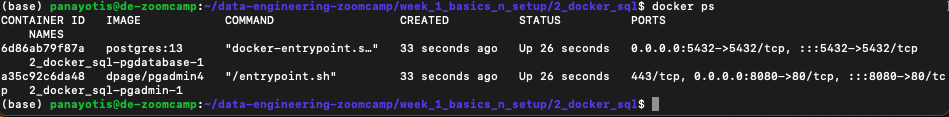

In [13]:
Image(filename='../images/docker_ps_cmd.png')

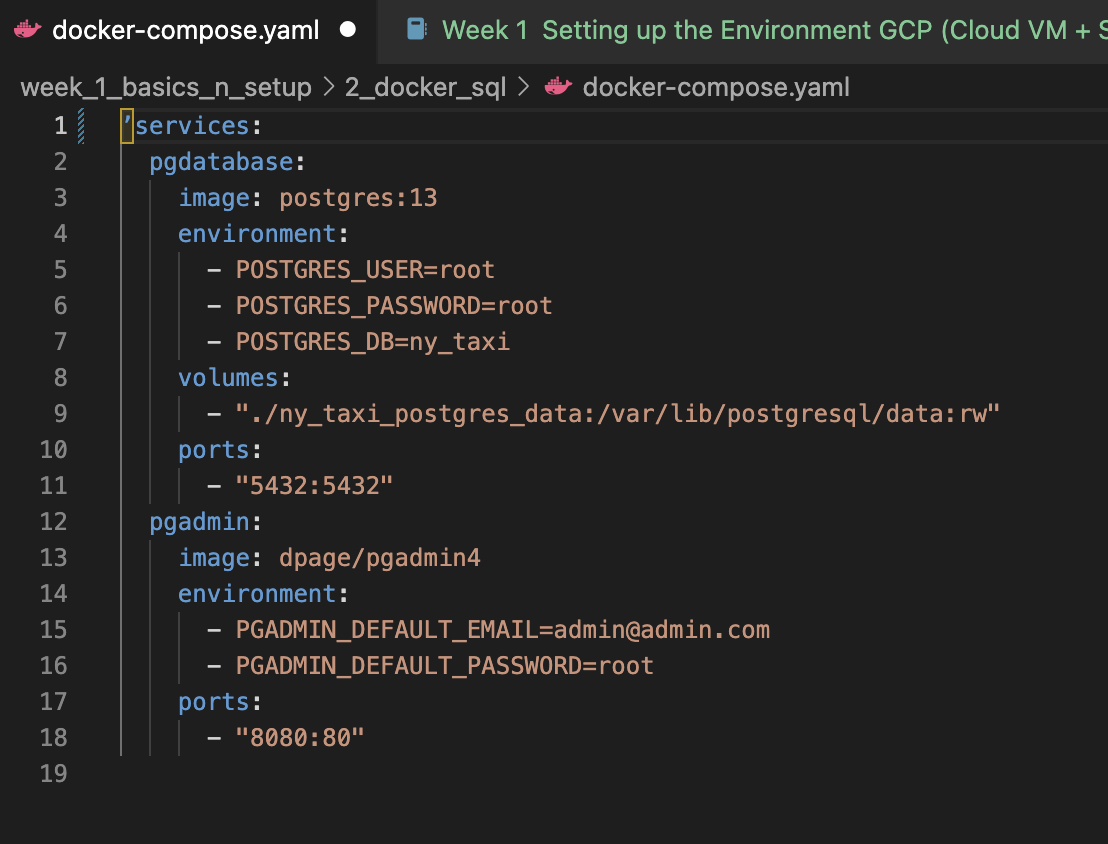

In [14]:
Image(filename='../images/docker_compose_yaml.png')

## Install PGCLI (command line interface for Postgres )

 - **Install via conda**,is better than pip for this package : conda install p